## 1. install depencies

In [3]:
!pip install torch==1.8.2 torchvision==0.9.2 torchaudio===0.8.2 --extra-index-url https://download.pytorch.org/whl/lts/1.8/cu111

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/lts/1.8/cu111
  Using cached https://download.pytorch.org/whl/lts/1.8/cu111/torch-1.8.2%2Bcu111-cp39-cp39-win_amd64.whl (3057.4 MB)
  Using cached https://download.pytorch.org/whl/lts/1.8/cu111/torchvision-0.9.2%2Bcu111-cp39-cp39-win_amd64.whl (1.9 MB)
  Using cached https://download.pytorch.org/whl/lts/1.8/torchaudio-0.8.2-cp39-none-win_amd64.whl (109 kB)
  Using cached numpy-1.22.4-cp39-cp39-win_amd64.whl (14.7 MB)
  Using cached typing_extensions-4.2.0-py3-none-any.whl (24 kB)


In [4]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...


In [5]:
!cd yolov5 & pip install -r requirements.txt

  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached charset_normalizer-2.0.12-py3-none-any.whl (39 kB)
  Using cached idna-3.3-py3-none-any.whl (61 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_plugin_wit-1.8.1-py3-none-any.whl (781 kB)
  Using cached protobuf-3.19.4-cp39-cp39-win_amd64.whl (895 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached rsa-4.8-py3-none-any.whl (39 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
  Using cached oauthlib-3.2.0-py3-none-any.whl (151 kB)


In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

E:\anaconda_env\yolov5\yolo\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## 2. Load model

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5x6')

Using cache found in C:\Users\saski/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-6-18 Python-3.9.12 torch-1.8.2+cu111 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 8192MiB)

Fusing layers... 
YOLOv5x6 summary: 574 layers, 140730220 parameters, 0 gradients
Adding AutoShape... 


In [4]:
model

AutoShape(
  (model): DetectMultiBackend(
    (model): Model(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 80, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(80, 160, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(160, 80, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(160, 80, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(160, 160, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(80, 80, kernel_size=(1, 1), stride=(1, 1))
      

## 3. Make Detections with Images

In [3]:
img = "https://images.unsplash.com/photo-1589828155685-83225f7d91f3?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=710&q=80"

In [4]:
results = model(img)
results.print()

image 1/1: 1007x710 6 persons, 26 cars, 1 motorcycle, 1 bus, 2 trucks
Speed: 658.8ms pre-process, 1369.7ms inference, 3.5ms NMS per image at shape (1, 3, 640, 512)


In [5]:
print(results.pandas().xyxy[0]["name"])
num_vehicles = results.pandas().xyxy[0]["class"]
num = 0
for vehicle in num_vehicles:
    if vehicle == 2 or vehicle == 3 or vehicle == 5 or vehicle == 7:
        num+= 1

print(num)

0            car
1            car
2            car
3            car
4            car
5            car
6            bus
7            car
8            car
9          truck
10           car
11        person
12           car
13           car
14           car
15           car
16        person
17           car
18           car
19           car
20           car
21           car
22        person
23           car
24           car
25    motorcycle
26        person
27           car
28        person
29           car
30        person
31           car
32           car
33           car
34           car
35         truck
Name: name, dtype: object
30


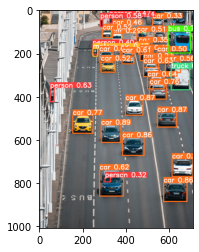

In [6]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [19]:
results.render()

[array([[[39, 35, 34],
         [39, 35, 34],
         [39, 35, 34],
         ...,
         [32, 28, 29],
         [31, 27, 28],
         [30, 26, 27]],
 
        [[34, 30, 29],
         [34, 30, 29],
         [35, 31, 30],
         ...,
         [25, 21, 22],
         [23, 19, 20],
         [23, 19, 20]],
 
        [[27, 23, 22],
         [28, 24, 23],
         [29, 25, 24],
         ...,
         [16, 12, 13],
         [15, 11, 12],
         [14, 10, 11]],
 
        ...,
 
        [[ 7,  6,  4],
         [ 7,  6,  4],
         [ 7,  6,  4],
         ...,
         [80, 78, 79],
         [81, 79, 80],
         [80, 78, 79]],
 
        [[ 8,  7,  5],
         [ 8,  7,  5],
         [ 8,  7,  5],
         ...,
         [80, 78, 79],
         [82, 80, 81],
         [79, 77, 78]],
 
        [[ 8,  7,  5],
         [ 8,  7,  5],
         [ 8,  7,  5],
         ...,
         [80, 78, 79],
         [82, 80, 81],
         [79, 77, 78]]], dtype=uint8)]

## 4. Real Time Detections

In [6]:
cap = cv2.VideoCapture("Cars - 1900.mp4")
while cap.isOpened():
    ret, frame = cap.read()
    
    #resize the frame
    frame = frame[:, 200:1280-100, :]
    
    # Make detections
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    results = model(frame)
    
    #count number of vehicles
    num_vehicles = results.pandas().xyxy[0]["class"]
    results.names
    num = 0
    for vehicle in num_vehicles:
        if vehicle == 2 or vehicle == 3 or vehicle == 5 or vehicle == 7:
            num+= 1

    print(num)
    
    cv2.imshow('YOLO', cv2.cvtColor(np.squeeze(results.render()), cv2.COLOR_BGR2RGB))
    results.print()
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

0
image 1/1: 480x640 1 person
Speed: 2.0ms pre-process, 52.5ms inference, 2.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 couch
Speed: 1.5ms pre-process, 51.5ms inference, 1.5ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 couch
Speed: 2.0ms pre-process, 51.5ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person
Speed: 1.5ms pre-process, 52.0ms inference, 2.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 bench
Speed: 1.5ms pre-process, 52.0ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 cat
Speed: 1.5ms pre-process, 45.0ms inference, 3.5ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 bench
Speed: 1.0ms pre-process, 45.0ms inference, 2.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 bench
Speed: 1.0ms pre-process, 46.0ms inference, 1.5ms NMS per image at shape (1, 3

0
image 1/1: 480x640 1 person, 1 bench, 1 couch
Speed: 1.0ms pre-process, 46.5ms inference, 2.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 bench, 1 couch
Speed: 1.0ms pre-process, 45.5ms inference, 3.5ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 bench
Speed: 1.5ms pre-process, 45.5ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 bench
Speed: 1.0ms pre-process, 45.0ms inference, 2.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 bench
Speed: 1.0ms pre-process, 45.0ms inference, 1.5ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 bench
Speed: 1.5ms pre-process, 46.5ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person
Speed: 1.0ms pre-process, 47.5ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person
Speed: 1.0ms pre-process, 46.5ms inference, 2.0ms NMS per 

0
image 1/1: 480x640 1 person, 1 couch
Speed: 1.0ms pre-process, 47.0ms inference, 1.5ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 couch
Speed: 1.5ms pre-process, 48.0ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 couch
Speed: 1.0ms pre-process, 47.5ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 bench
Speed: 1.0ms pre-process, 45.5ms inference, 1.5ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 bench
Speed: 1.0ms pre-process, 45.0ms inference, 1.5ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 bench
Speed: 1.0ms pre-process, 45.5ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 bench
Speed: 1.5ms pre-process, 46.5ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person
Speed: 1.0ms pre-process, 50.0ms inference, 1.5ms NMS per image at 

0
image 1/1: 480x640 1 person, 1 couch
Speed: 1.4ms pre-process, 47.5ms inference, 3.5ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 couch
Speed: 1.0ms pre-process, 46.0ms inference, 1.5ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 couch
Speed: 1.5ms pre-process, 45.5ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 couch
Speed: 1.0ms pre-process, 46.0ms inference, 2.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 couch
Speed: 1.0ms pre-process, 44.5ms inference, 1.5ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 couch
Speed: 1.0ms pre-process, 46.0ms inference, 1.5ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 couch
Speed: 1.5ms pre-process, 50.5ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 couch
Speed: 1.0ms pre-process, 46.0ms inference, 1.5ms NMS per 

0
image 1/1: 480x640 1 person, 1 couch
Speed: 1.0ms pre-process, 46.5ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 couch
Speed: 1.0ms pre-process, 45.5ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 couch
Speed: 1.0ms pre-process, 46.5ms inference, 2.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 couch
Speed: 1.0ms pre-process, 47.5ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 couch
Speed: 1.0ms pre-process, 48.5ms inference, 1.5ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 couch
Speed: 1.0ms pre-process, 46.5ms inference, 1.5ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 couch
Speed: 1.5ms pre-process, 48.0ms inference, 1.5ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 couch
Speed: 1.0ms pre-process, 46.5ms inference, 3.0ms NMS per 

0
image 1/1: 480x640 1 person, 1 couch
Speed: 1.5ms pre-process, 45.5ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 couch
Speed: 1.0ms pre-process, 45.0ms inference, 1.5ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 couch
Speed: 1.5ms pre-process, 45.5ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 couch
Speed: 1.5ms pre-process, 47.0ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 couch
Speed: 1.0ms pre-process, 47.5ms inference, 1.5ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 couch
Speed: 1.5ms pre-process, 47.5ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 couch
Speed: 1.0ms pre-process, 47.5ms inference, 1.5ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 couch
Speed: 1.5ms pre-process, 46.0ms inference, 3.5ms NMS per 

0
image 1/1: 480x640 1 person, 1 couch
Speed: 1.0ms pre-process, 47.0ms inference, 1.5ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 couch
Speed: 1.5ms pre-process, 47.0ms inference, 2.5ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 couch
Speed: 1.5ms pre-process, 47.5ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 couch
Speed: 1.5ms pre-process, 47.5ms inference, 2.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 couch
Speed: 1.0ms pre-process, 48.0ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 couch
Speed: 1.5ms pre-process, 47.0ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 couch
Speed: 1.5ms pre-process, 44.5ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 couch
Speed: 1.0ms pre-process, 46.0ms inference, 3.0ms NMS per 

0
image 1/1: 480x640 1 person, 1 couch
Speed: 1.5ms pre-process, 44.5ms inference, 1.5ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 couch
Speed: 1.0ms pre-process, 45.5ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 couch
Speed: 1.0ms pre-process, 46.5ms inference, 1.5ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 bench, 1 couch
Speed: 1.0ms pre-process, 47.5ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 couch
Speed: 1.0ms pre-process, 48.0ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 couch
Speed: 1.5ms pre-process, 48.0ms inference, 3.5ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 couch
Speed: 1.0ms pre-process, 47.5ms inference, 1.5ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 couch
Speed: 1.5ms pre-process, 46.0ms inference, 3.0ms

0
image 1/1: 480x640 1 person, 1 bench
Speed: 1.0ms pre-process, 45.5ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 bench
Speed: 1.5ms pre-process, 46.0ms inference, 1.5ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 bench
Speed: 1.0ms pre-process, 47.5ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person
Speed: 1.0ms pre-process, 47.5ms inference, 2.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person
Speed: 1.0ms pre-process, 47.5ms inference, 2.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person
Speed: 1.0ms pre-process, 47.5ms inference, 1.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person
Speed: 1.0ms pre-process, 46.0ms inference, 1.5ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 cell phone
Speed: 1.0ms pre-process, 45.0ms inference, 2.0ms NMS per image at shape (1, 3, 512, 640)

0
image 1/1: 480x640 1 person
Speed: 1.5ms pre-process, 45.0ms inference, 2.5ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person
Speed: 1.5ms pre-process, 45.5ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 bench
Speed: 1.0ms pre-process, 47.0ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 toothbrush
Speed: 1.0ms pre-process, 47.5ms inference, 2.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person
Speed: 1.5ms pre-process, 50.5ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person
Speed: 1.0ms pre-process, 49.0ms inference, 1.5ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person
Speed: 1.5ms pre-process, 47.5ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person
Speed: 1.5ms pre-process, 46.0ms inference, 2.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x

0
image 1/1: 480x640 1 person
Speed: 1.0ms pre-process, 46.0ms inference, 2.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person
Speed: 1.0ms pre-process, 48.5ms inference, 1.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person
Speed: 1.0ms pre-process, 45.0ms inference, 1.5ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person
Speed: 1.5ms pre-process, 45.0ms inference, 1.5ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person
Speed: 1.0ms pre-process, 46.5ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person
Speed: 1.0ms pre-process, 47.0ms inference, 2.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person
Speed: 1.5ms pre-process, 46.0ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person
Speed: 1.5ms pre-process, 47.5ms inference, 3.5ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person
Speed: 1.0

0
image 1/1: 480x640 1 person
Speed: 1.0ms pre-process, 46.0ms inference, 2.5ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 bench
Speed: 1.0ms pre-process, 45.5ms inference, 2.5ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 bench
Speed: 1.5ms pre-process, 46.0ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person
Speed: 1.0ms pre-process, 48.0ms inference, 1.5ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person
Speed: 1.5ms pre-process, 47.5ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person
Speed: 1.5ms pre-process, 47.0ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person
Speed: 1.0ms pre-process, 47.5ms inference, 1.5ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person
Speed: 1.0ms pre-process, 46.0ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1

0
image 1/1: 480x640 1 person
Speed: 1.0ms pre-process, 46.0ms inference, 3.5ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person
Speed: 1.0ms pre-process, 46.5ms inference, 1.5ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person
Speed: 1.0ms pre-process, 44.5ms inference, 1.5ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 bench
Speed: 1.0ms pre-process, 46.0ms inference, 3.5ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 bench
Speed: 1.0ms pre-process, 47.5ms inference, 1.5ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 bench
Speed: 1.5ms pre-process, 48.0ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person
Speed: 1.0ms pre-process, 48.0ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person
Speed: 1.0ms pre-process, 48.0ms inference, 1.5ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 

0
image 1/1: 480x640 1 person
Speed: 1.0ms pre-process, 46.5ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person
Speed: 1.5ms pre-process, 46.0ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 bench
Speed: 1.0ms pre-process, 48.0ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 bench
Speed: 1.0ms pre-process, 48.5ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 bench
Speed: 1.0ms pre-process, 48.0ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person
Speed: 1.0ms pre-process, 45.5ms inference, 3.5ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person
Speed: 1.0ms pre-process, 46.5ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
image 1/1: 480x640 1 person, 1 bench
Speed: 1.0ms pre-process, 46.0ms inference, 3.0ms NMS per image at shape (1, 3, 512, 640)
0
im

## 5. detect numbers of vehicles in every traffic light

In [120]:
#set dic to traffic light. First value number of repeating and second number of vehicles
traffic_light = np.array([ [0,0], [0,0], [0,0], [0,0] ])

#set four images for testing traffic light
imgs = ["https://focastock.com/wp-content/uploads/2019/04/P1030336.jpg",
        "https://images.unsplash.com/photo-1589828155685-83225f7d91f3?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=710&q=80",
        "https://media.baamboozle.com/uploads/images/199143/1642726643_69020.jpeg",
        "https://res.cloudinary.com/twenty20/private_images/t_watermark-criss-cross-10/v1538121876000/photosp/e0f3f938-58c9-40b5-99a6-e5f5733eb76c/stock-photo-car-road-transportation-street-vehicle-automobile-cars-auto-front-e0f3f938-58c9-40b5-99a6-e5f5733eb76c.jpg"]

# get number of vehicles in every traffic light and get higher value for that traffic light
i = 0;
for img in imgs:
    results = model(img)
    num_vehicles = results.pandas().xyxy[0]["class"]
    num = 0
    for vehicle in num_vehicles:
        if vehicle == 2 or vehicle == 3 or vehicle == 5 or vehicle == 7:
            num+= 1
    traffic_light[i,1] = num
    print("number of vehicles in traffic light "+str(i+1)+": ", num)
    i+= 1

number of vehicles in traffic light 1:  10
number of vehicles in traffic light 2:  30
number of vehicles in traffic light 3:  24
number of vehicles in traffic light 4:  5


## get the max value and add for repeating

In [121]:
#this for testing the max number
max_num = np.max(traffic_light[:,1])
#get index of max number
index_max_num = np.argmax(traffic_light[:,1])

print(max_num)
print(index_max_num)

#set wall traffic light to zero except the max value that is adding one
for i in range(4):
    if index_max_num == i:
        traffic_light[i,0]+= 1
    else:
        traffic_light[i,0] = 0
print(traffic_light)

30
1
[[ 0 10]
 [ 1 30]
 [ 0 24]
 [ 0  5]]
